     0             1
0  0.0 -34289.804688
1  1.0 -49443.976562
2  2.0 -64129.828125
3  3.0 -76420.054688
4  4.0 -85697.617188


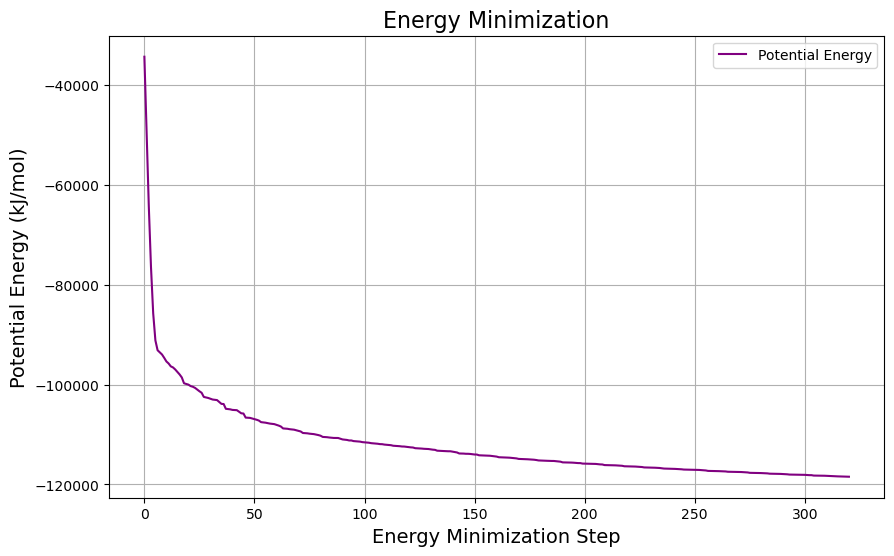

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data, skipping the first 24 rows
data = pd.read_csv('potential.xvg', delim_whitespace=True, comment='@', skiprows=24, header=None)

# Display the first few rows to understand the structure
print(data.head())

# Assuming the first column is time and the second is potential energy
# Adjust the indices as needed based on your file structure
time = data[0]
potential_energy = data[1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, potential_energy, label='Potential Energy', color='Purple')
plt.xlabel('Energy Minimization Step',fontsize=14)
plt.ylabel('Potential Energy (kJ/mol)',fontsize=14)
plt.title('Energy Minimization',fontsize=16)
plt.legend()
plt.grid()

# Save the figure as a PNG file
plt.savefig('EnergyMinimization_plot.png', format='png', dpi=300)  # dpi for resolution
plt.show()


     0           1
0  0.0  299.140320
1  1.0  296.565094
2  2.0  296.390381
3  3.0  306.700684
4  4.0  299.154907


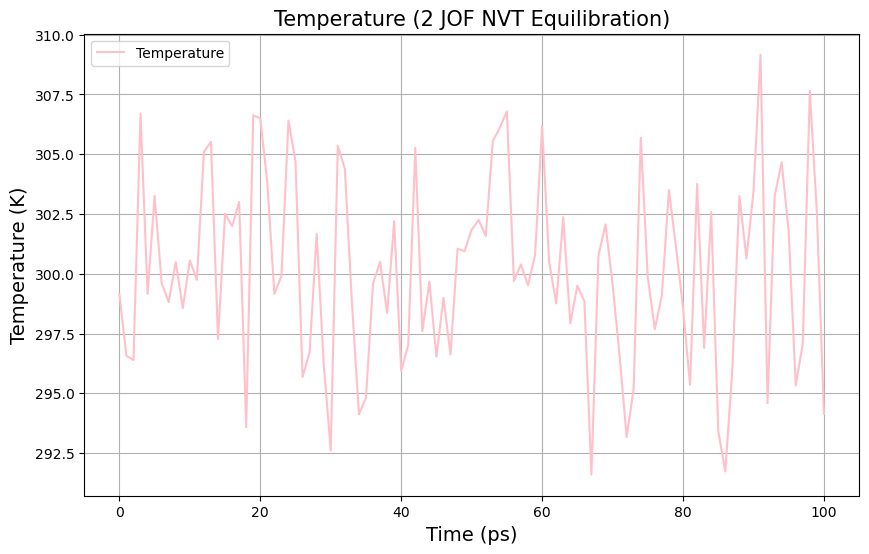

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the temperature data, skipping the first 24 rows
data = pd.read_csv('temperature.xvg', delim_whitespace=True, comment='@', skiprows=24, header=None)

# Display the first few rows to understand the structure
print(data.head())

# Assuming the first column is time and the second is temperature
# Adjust the indices if necessary based on your file structure
time = data[0]
temperature = data[1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, temperature, label='Temperature', color='Pink')
plt.xlabel('Time (ps)',fontsize=14)
plt.ylabel('Temperature (K)',fontsize=14)
plt.title('Temperature (2 JOF NVT Equilibration)',fontsize=15)
plt.legend()
plt.grid()
# Save the figure as a PNG file
plt.savefig('Temperature_plot.png', format='png', dpi=300)  # dpi for resolution
plt.show()


     0           1
0  0.0   50.541611
1  1.0 -314.036652
2  2.0   97.275650
3  3.0  -14.432892
4  4.0  167.607208


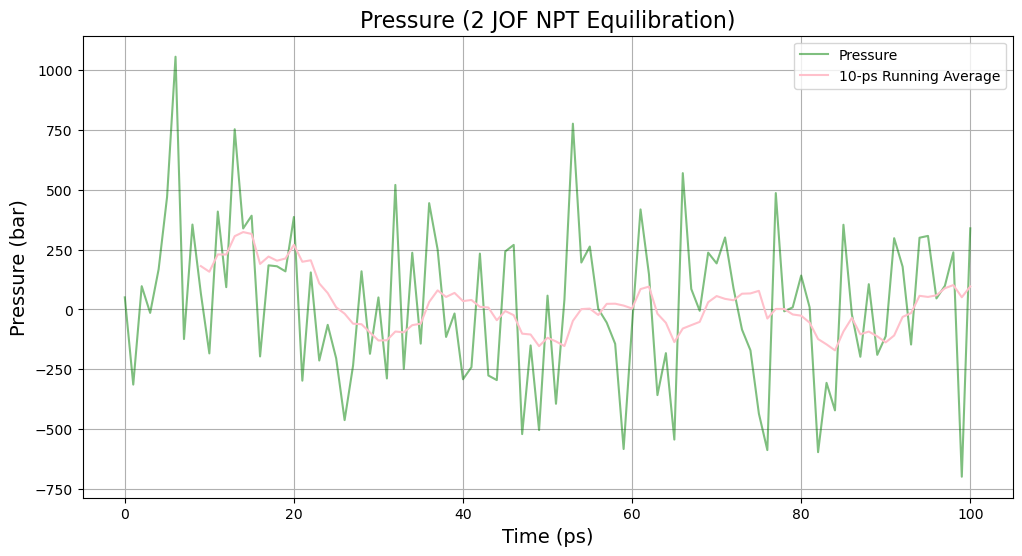

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the pressure data, skipping the first 24 rows
data = pd.read_csv('pressure.xvg', delim_whitespace=True, comment='@', skiprows=24, header=None)

# Display the first few rows to understand the structure
print(data.head())

# Assuming the first column is time and the second is pressure
time = data[0]
pressure = data[1]

# Calculate the running average (moving average)
window_size = 10  # Adjust the window size as needed
running_avg_pressure = pressure.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, pressure, label='Pressure', color='green', alpha=0.5)
plt.plot(time, running_avg_pressure, label='10-ps Running Average', color='Pink')
plt.xlabel('Time (ps)',fontsize=14)
plt.ylabel('Pressure (bar)',fontsize=14)
plt.title('Pressure (2 JOF NPT Equilibration)',fontsize=16)

plt.legend()
plt.grid()
# Save the figure as a PNG file
plt.savefig('Pressure_plot.png', format='png', dpi=300)  # dpi for resolution
plt.show()

     0            1
0  0.0   994.182861
1  1.0  1008.669189
2  2.0  1017.060669
3  3.0  1013.197571
4  4.0  1013.785706


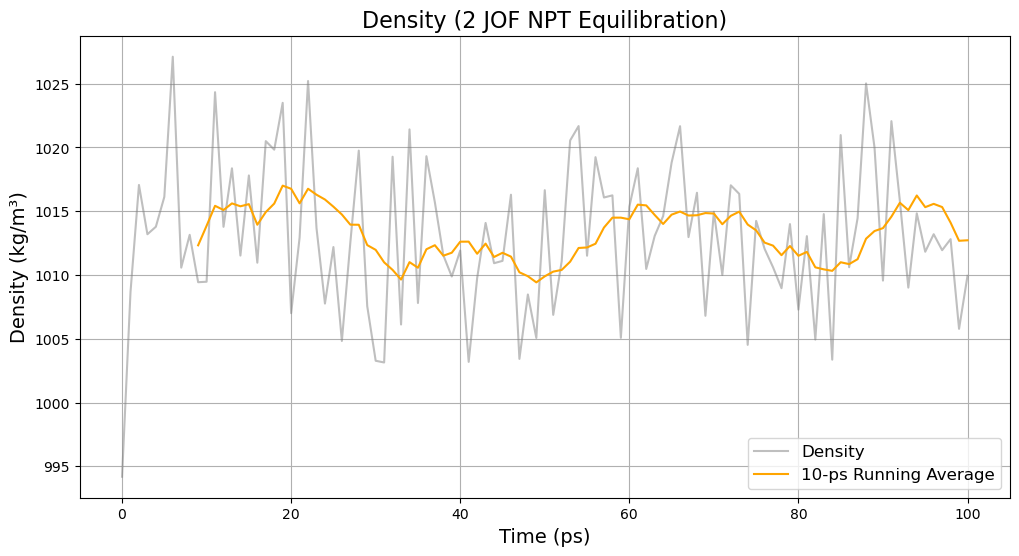

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the density data, skipping the first 24 rows
data = pd.read_csv('density.xvg', delim_whitespace=True, comment='@', skiprows=24, header=None)

# Display the first few rows to understand the structure
print(data.head())

# Assuming the first column is time and the second is density
time = data[0]
density = data[1]

# Calculate the running average (moving average)
window_size = 10  # Adjust the window size as needed
running_avg_density = density.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, density, label='Density', color='Gray', alpha=0.5)
plt.plot(time, running_avg_density, label='10-ps Running Average', color='orange')
plt.xlabel('Time (ps)',fontsize=14)
plt.ylabel('Density (kg/m³)',fontsize=14)
plt.title('Density (2 JOF NPT Equilibration)',fontsize=16)
plt.legend(fontsize=12)
plt.grid()
# Save the figure as a PNG file
plt.savefig('Density_plot.png', format='png', dpi=300)  # dpi for resolution
plt.show()

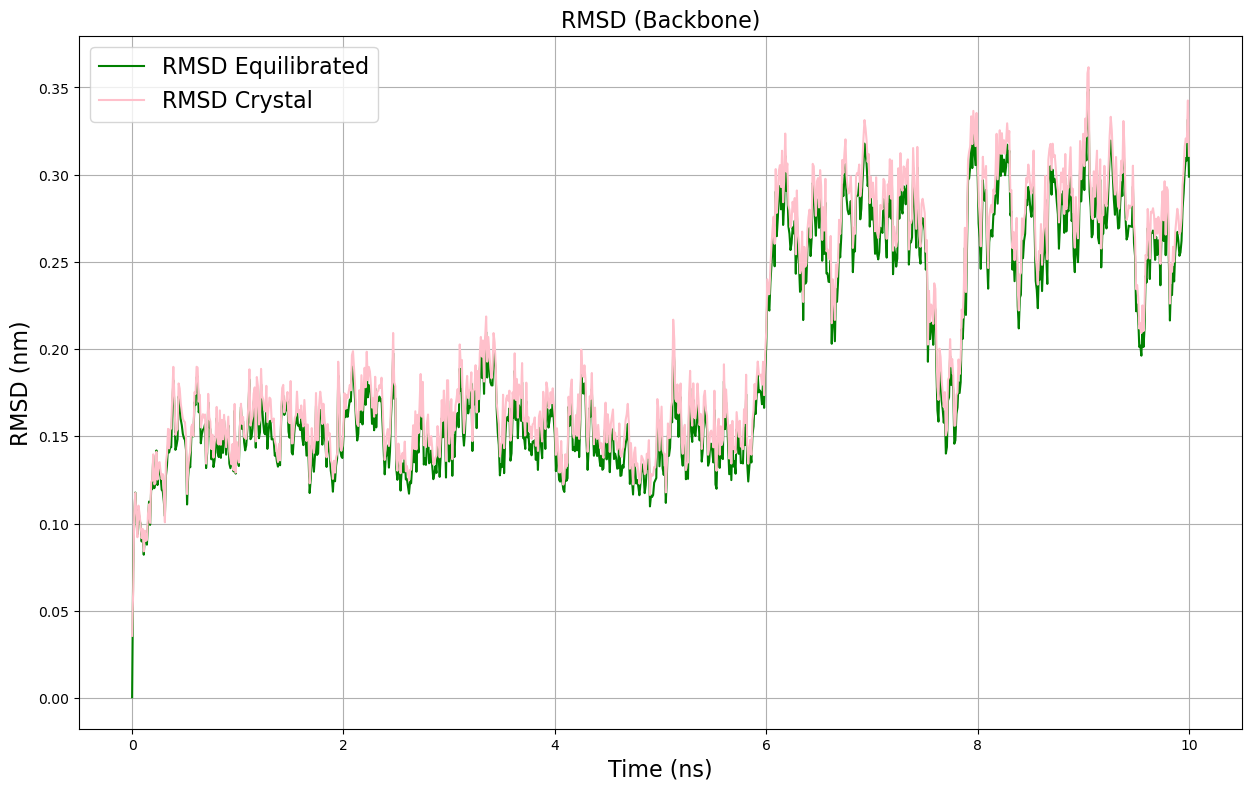

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def load_rmsd_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('@') or line.startswith('#'):
                continue  # Skip comments
            data.append(line.split())
    return np.array(data, dtype=float)

# Load data
data_rmsd = load_rmsd_data('rmsd.xvg')
data_rmsd_xtal = load_rmsd_data('rmsd_xtal.xvg')

# Assuming the first column is time and the second column is RMSD
time_rmsd = data_rmsd[:, 0]
rmsd = data_rmsd[:, 1]

time_rmsd_xtal = data_rmsd_xtal[:, 0]
rmsd_xtal = data_rmsd_xtal[:, 1]

# Plotting
plt.figure(figsize=(15, 9))
plt.plot(time_rmsd, rmsd, label='RMSD Equilibrated', color='Green', linewidth=1.5)
plt.plot(time_rmsd_xtal, rmsd_xtal, label='RMSD Crystal', color='pink', linewidth=1.5)
plt.title('RMSD (Backbone)', fontsize=16)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.legend(fontsize=16)
plt.grid()
# Save the figure as a PNG file
plt.savefig('rmsd_plot.png', format='png', dpi=300)  # dpi for resolution
plt.show()

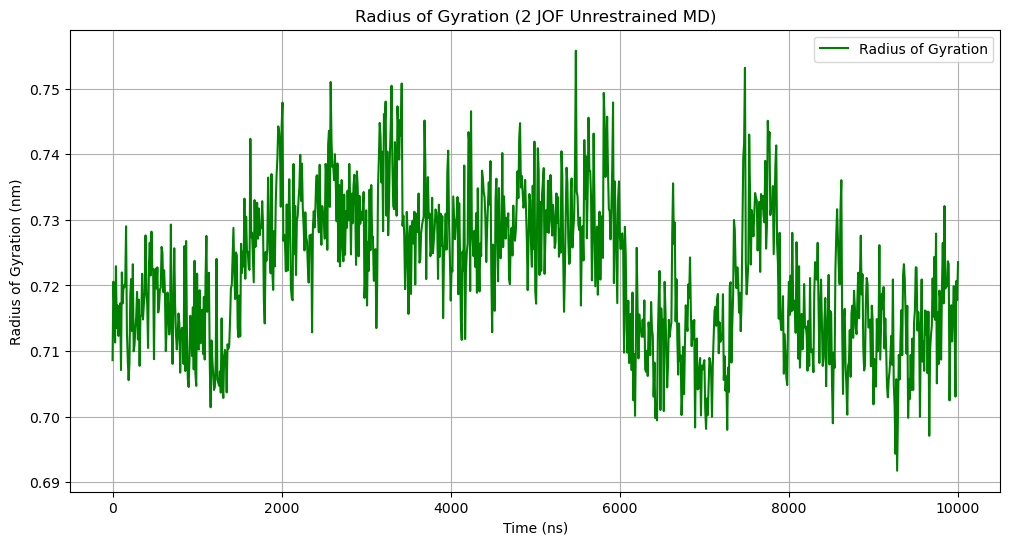

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from gyrate.xvg, skipping the first 27 lines
data = np.loadtxt('gyrate.xvg', comments=['@', '#'], skiprows=27)
time = data[:, 0]  # Time in ns
gyration_radius = data[:, 1]  # Radius of Gyration values

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(time, gyration_radius, label='Radius of Gyration', color='green')
plt.xlabel('Time (ns)')
plt.ylabel('Radius of Gyration (nm)')
plt.title('Radius of Gyration (2 JOF Unrestrained MD)')
plt.legend()
plt.grid()

# Save the plot as a JPG file
plt.savefig('radius_of_gyration.jpg', format='jpg', dpi=300)

# Optionally, display the plot
plt.show()

